In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df=pd.read_csv('../Data/CreditCard.csv')

In [119]:
df.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


## Var Type
- **Catag :** card,owner,selfemp
- **Numerical :** reports,age,income,share,expenditure,dependents,months,majorcards,active

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1319 non-null   int64  
 1   card         1319 non-null   object 
 2   reports      1319 non-null   int64  
 3   age          1319 non-null   float64
 4   income       1319 non-null   float64
 5   share        1319 non-null   float64
 6   expenditure  1319 non-null   float64
 7   owner        1319 non-null   object 
 8   selfemp      1319 non-null   object 
 9   dependents   1319 non-null   int64  
 10  months       1319 non-null   int64  
 11  majorcards   1319 non-null   int64  
 12  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 134.1+ KB


In [121]:
df.describe()

,Unnamed: 0,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,660.000000,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,380.906813,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,1.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.500000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,660.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,989.500000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1319.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [122]:
def univariate_numerical(col_name):
    print(f"Skewness: {df[col_name].skew()}")
    print(f"Mean: {df[col_name].mean()} ,median {df[col_name].median()} ,mode {df[col_name].mode()}")
    print (f"No of null values {df[col_name].isnull().sum()}")
    plt.figure(figsize=(10,6))
    
    plt.subplot(231)
    df[col_name].plot(kind='kde',title="Kde plot")
    
    plt.subplot(232)
    df[col_name].plot(kind='hist',xlabel='age',title="Histogram",bins=10)

    plt.subplot(233)
    df[col_name].plot(kind='box',title="Box plot")

    plt.tight_layout()
    plt.show()

## Analysing for age
- outliars are present but as those are valid age so **No outliars**
- positively skewed (0.841)
- high no of people are in range 20-30

Skewness: 0.8414281938902346
Mean: 33.21310325496589 ,median 31.25 ,mode 0    28.16667
Name: age, dtype: float64
No of null values 0


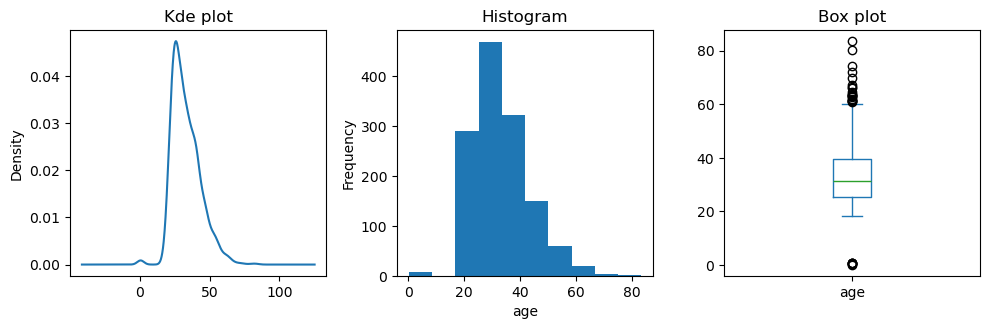

In [123]:
univariate_numerical('age')

## Analysing income
**Conclusion**
- Highly positively skewed (1.9280)
- In income outliars are acceptable so no outliars
- Higher no of people lie between 2-3

Skewness: 1.9280852150909495
Mean: 3.3653760424564068 ,median 2.9 ,mode 0    3.0
Name: income, dtype: float64
No of null values 0


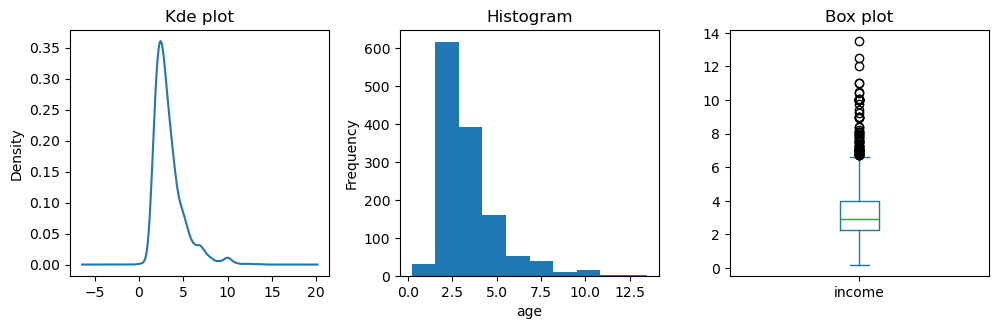

In [124]:
univariate_numerical('income')

## Anlysing Share

**Conclusion :**

- Highly skewed
- Higher people share ration are in 0-0.1
- outliars present,performed outliars treatment over 0.3

Skewness: 3.1676060202031358
Mean: 0.06873217313987869 ,median 0.03882722 ,mode 0    0.00048
Name: share, dtype: float64
No of null values 0


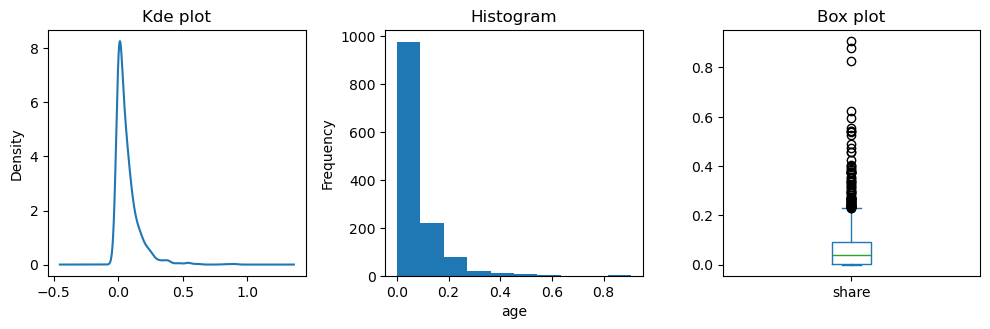

In [125]:
univariate_numerical('share')

In [126]:
df[df['share']>0.3].shape

(37, 13)

In [129]:
df[df['share']>0.3]=df['share'].median()

Skewness: 1.409924069268566
Mean: 0.05717591744617134 ,median 0.03882722 ,mode 0    0.038827
Name: share, dtype: float64
No of null values 0


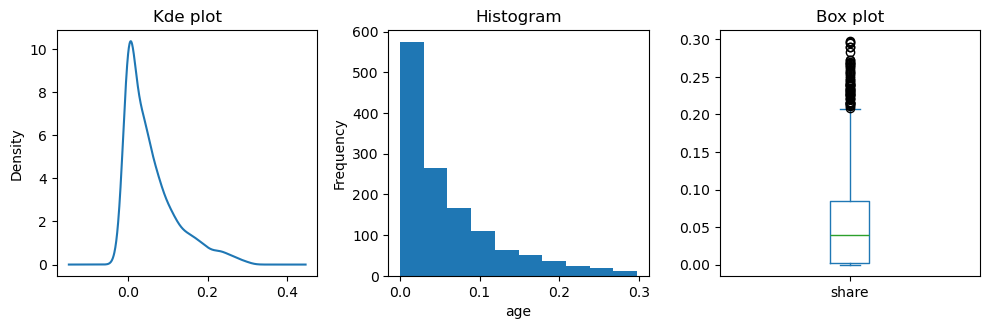

In [130]:
univariate_numerical('share')